## 吴恩达机器学习习题七：聚类（K-均值算法）<br><br>
- 对一个二维数据使用K-均值算法进行聚类

![](./IMG_3373.JPG)

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import scipy.io as sio

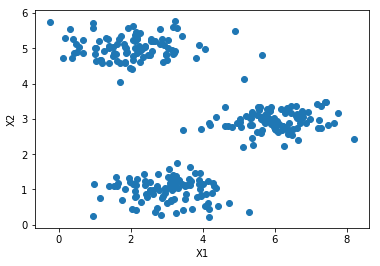

In [2]:
#读取数据&数据可视化
data = sio.loadmat('data/ex7data2.mat')
X = data['X']  #(300,2)
plt.scatter(X[:,0],X[:,1])
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

In [3]:
#分类
def find_centroids(X,centros):
    
    idx = []
    for i in range(len(X)):  
        distance = np.linalg.norm((X[i]-centros),axis=1)  #(3,),X每一行到每个中心点的距离，返回3维行向量
        id_i =np.argmin(distance)  #寻找行向量中距离最小的索引
        idx.append(id_i)
    return np.array(idx)

In [4]:
centros = np.array([[3, 3], [6, 2], [8, 5]])
idx = find_centroids(X,centros)
idx[:3]

array([0, 2, 1], dtype=int64)

In [5]:
#调整聚类中心
def compute_centros(X,idx,K):
    
    centros = []
    for i in range(K):
        centros_i = np.mean(X[idx == i],axis=0)  #计算每一组中每一列的平均值，(1,2)
        centros.append(centros_i)  
    return np.array(centros)

In [6]:
centros1 = compute_centros(X,idx,3)

In [7]:
#重复执行
def run_kmeans(X,centros,times):
    
    K = len(centros)
    centros_all = []
    centros_all.append(centros)
    centros_i = centros
    for i in range(times):
        idx = find_centroids(X,centros_i)
        centros_i = compute_centros(X,idx,K)
        centros_all.append(centros_i)
    return idx,np.array(centros_all)

In [8]:
#画出图像
def plot_imagines(X,centros_all,idx):
    
    plt.figure()
    plt.scatter(X[:,0],X[:,1],c=idx,cmap='rainbow')
    plt.plot(centros_all[:,:,0],centros_all[:,:,1],'kx--')

[[[3.         3.        ]
  [6.         2.        ]
  [8.         5.        ]]

 [[2.42830111 3.15792418]
  [5.81350331 2.63365645]
  [7.11938687 3.6166844 ]]

 [[2.31325526 3.22830617]
  [5.33273768 2.43159599]
  [6.8653618  3.23293995]]

 [[2.19692479 3.42136707]
  [4.83555397 2.12976745]
  [6.6560054  3.0751355 ]]

 [[1.98241171 4.0250785 ]
  [3.91150763 1.47060546]
  [6.34008592 3.05366642]]

 [[1.95399466 5.02557006]
  [3.12663743 1.1121712 ]
  [6.12919526 3.01606258]]

 [[1.95399466 5.02557006]
  [3.04367119 1.01541041]
  [6.03366736 3.00052511]]

 [[1.95399466 5.02557006]
  [3.04367119 1.01541041]
  [6.03366736 3.00052511]]

 [[1.95399466 5.02557006]
  [3.04367119 1.01541041]
  [6.03366736 3.00052511]]

 [[1.95399466 5.02557006]
  [3.04367119 1.01541041]
  [6.03366736 3.00052511]]

 [[1.95399466 5.02557006]
  [3.04367119 1.01541041]
  [6.03366736 3.00052511]]]


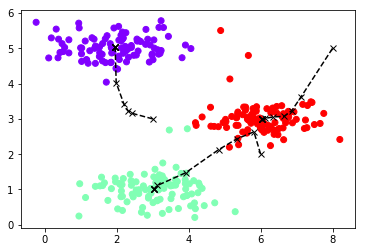

In [9]:
idx,centros_all = run_kmeans(X,centros,times=10)
plot_imagines(X,centros_all,idx)
print(centros_all)

In [10]:
#观察不同起始点对分类的影响
#随机初始化
def init_centros(X,k):
    index = np.random.choice(len(X),k)  #范围为0到len(X)，随机生成k个数
    return X[index]   #返回X的第index行

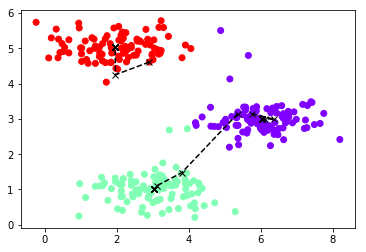

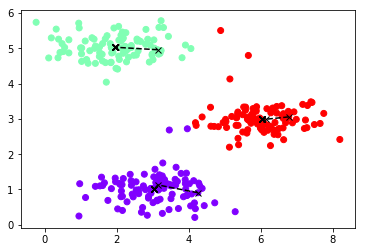

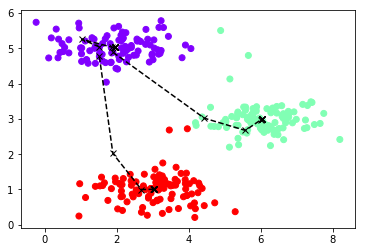

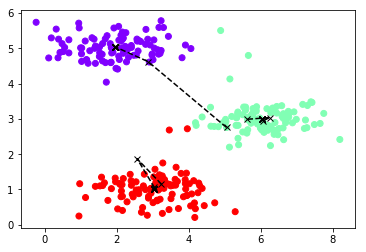

In [11]:
for i in range(4):
    centros = init_centros(X,3)
    idx,centros_all = run_kmeans(X,centros,times=10)
    plot_imagines(X,centros_all,idx)